# Gets the average number of peaks that intersect skipped exon regions
- spans: | ]----[   ]----[ |
- 2244 native cassette exons for K562: 
    - /projects/ps-yeolab3/encode/k562_brenton-graveley_ambiguous_bams_for_integrated_analysis.txt.nSEall_0.5_20170805.NR
- 1832 native cassette exons for HepG2: 
    - /projects/ps-yeolab3/encode/hepg2_brenton-graveley_ambiguous_bams_for_integrated_analysis.txt.nSEall_0.5_20170805.NR

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import glob
from collections import defaultdict
from tqdm import tnrange, tqdm_notebook
sns.set_style("ticks")
import matplotlib
from matplotlib import rc
rc('text', usetex=False)
matplotlib.rcParams['svg.fonttype'] = 'none'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})


In [3]:
wd = '/projects/ps-yeolab3/bay001/maps/current/se_peak/'
# wd = '/projects/ps-yeolab3/bay001/maps/current/idr_peaks/'
output_dir = '/home/bay001/projects/gabe_qc_20170612/analysis/'
# peak_hist contains a file with the number of peaks intersecting a region and the number of peaks that don't.
# choose native cassette exons (all skipped exon regions)
# peak_hist = glob.glob(os.path.join(wd, '*native-cassette-exons.miso.hist.overlapping_peaks'))
peak_hist_excl = glob.glob(os.path.join(wd,'*excluded-upon-knockdown.hist.overlapping_peaks'))
peak_hist_incl = glob.glob(os.path.join(wd,'*included-upon-knockdown.hist.overlapping_peaks'))
len(peak_hist_excl)

302

In [4]:
peak_hist = peak_hist_incl
label='significantly included'

summed = 0 # sum of all peaks intersecting an event region
total_events = 0 # sum of all events combined
total_count = 0 # total number of RBPs counted.

all_percentages = defaultdict() # percent of intersecting/(intersecting+nonintersecting) peaks for each file
all_overlapping = defaultdict() # number of intersecting peaks for each file

for peak_hist in [peak_hist_incl, peak_hist_excl]:
    progress = tnrange(len(peak_hist))
    for fn in peak_hist:
        df = pd.read_table(fn)
        df['percentage'] = df['intersect'].div((df['intersect'] + df['no_intersect']))
        summed += df.ix[0]['intersect']
        total_events += (df.ix[0]['intersect'] + df.ix[0]['no_intersect'])
        total_count += 1
        all_overlapping[fn] = df['intersect']
        all_percentages[fn] = df['percentage']
        progress.update(1)

print("total number of peaks for all rbps: {}".format(summed))
print("total number of events for all rbps: {}".format(total_events))
print("total sample count: {}".format(total_count))
print("percentage of overlapping peaks: {}".format(summed/float(total_events)))

Widget Javascript not detected.  It may not be installed or enabled properly.


/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
Widget Javascript not detected.  It may not be installed or enabled properly.



total number of peaks for all rbps: 18647
total number of events for all rbps: 4621656
total sample count: 604
percentage of overlapping peaks: 0.00403470098164


In [5]:
number_overlapping = pd.DataFrame(all_overlapping).T
number_overlapping.columns = ['Number']
number_overlapping['Number'].mean()

30.872516556291391

'/home/bay001/projects/gabe_qc_20170612/analysis/'

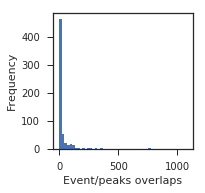

In [24]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.xaxis.set_visible(True)
number_overlapping['Number'].plot(kind='hist', bins=50, ax=ax)
plt.xlabel('Event/peaks overlaps')
plt.savefig(os.path.join(output_dir, 'overlapping_inputnormed_peaks.histogram.svg'))
output_dir

302/|/100%|| 302/302 [00:15<00:00, 92.91it/s]

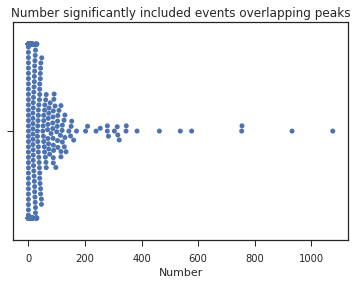

In [7]:
sns.swarmplot(number_overlapping['Number'])
plt.figsize = (1,1)
plt.title('Number {} events overlapping peaks'.format(label))
# plt.savefig(os.path.join(output_dir, '{}_overlapping_inputnormed_peaks.svg'.format(label.replace(' ','_'))))

In [8]:
percent_overlapping = pd.DataFrame(all_percentages).T
percent_overlapping = percent_overlapping*100
percent_overlapping.columns = ['Percent']

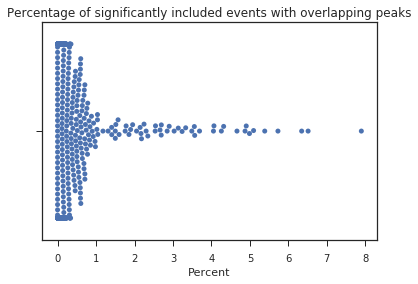

In [9]:
sns.swarmplot(percent_overlapping['Percent'])
plt.title('Percentage of {} events with overlapping peaks'.format(label))
# plt.savefig(os.path.join(output_dir, '{}_overlapping_inputnormed_peaks_percentage.svg'.format(label.replace(' ','_'))))

# Checks to make sure the right numbers are adding up.

In [10]:
pd.read_table(peak_hist[1])

,infile,intersect,no_intersect
0,/home/elvannostrand/data/clip/CLIPseq_analysis...,2,13242


In [11]:
df = pd.read_table(
    pd.read_table(peak_hist[1])['infile'][0], 
    names=['chrom','start','end','p','f','strand']
)
df[(df['p']>3) & (df['f']>3)].shape

(13244, 6)

In [12]:
106+4293

4399

# Same swarm plot except using the sum of incl+excl events
- plot vertically

In [13]:
from collections import defaultdict

peaks_intersecting = defaultdict(list)

progress = tnrange(len(peak_hist_excl)) # for each count of peak overlaps in excluded/kd sample:
for fn in peak_hist_excl:
    label = os.path.basename(fn).split('-excluded')[0] # just get the prefix (everything before -excluded-upon-knockdown)
    excl_df = pd.read_table(fn)
    if os.path.exists(fn.replace('excluded','included')): # if an 'included' file exists, read an append count
        incl_df = pd.read_table(fn.replace('excluded','included'))
        peaks_intersecting[label].append(incl_df.iloc[0]['intersect'])
    peaks_intersecting[label].append(excl_df.iloc[0]['intersect'])
    progress.update(1)
df = pd.DataFrame(peaks_intersecting).T
df.columns = ['Included','Excluded']
df.head()

Widget Javascript not detected.  It may not be installed or enabled properly.


,Included,Excluded
203_01.basedon_203_01.peaks.l2inputnormnew.bed.compressed.HNRNPC-BGHLV20-HepG2,27,10
203_02.basedon_203_02.peaks.l2inputnormnew.bed.compressed.HNRNPC-BGHLV20-HepG2,40,5
204_01.basedon_204_01.peaks.l2inputnormnew.bed.compressed.RBFOX2-BGHLV26-HepG2,11,72
204_02.basedon_204_02.peaks.l2inputnormnew.bed.compressed.RBFOX2-BGHLV26-HepG2,15,100
205_01.basedon_205_01.peaks.l2inputnormnew.bed.compressed.IGF2BP1-BGHcLV03-HepG2,0,0


In [14]:
df['Total'] = df.sum(axis=1)
df['log10Total'] = np.log10(df['Total'])
# df.to_csv(os.path.join(output_dir,'overlapping_peaks.txt'), sep='\t')

/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [15]:
# sns.swarmplot(df['Total'], orient='v')
# plt.title('Significant events with overlapping peaks')
# plt.savefig(os.path.join(output_dir, 'overlapping_inputnormed_peaks.svg'))

In [16]:
# plt.title('Significant events with overlapping peaks (log10)')
# fig, ax = plt.subplots(111)
# 2.5 by 2.5
# dots smaller (3 or 4)
# font size 8?
# 
# ax = sns.swarmplot(df['log10Total'], orient='v')
# plt.savefig(os.path.join(output_dir, 'overlapping_inputnormed_peaks.log10.svg'))


# Plot a histogram

'/home/bay001/projects/gabe_qc_20170612/analysis/'

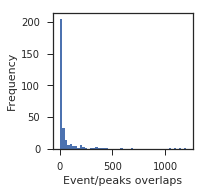

In [17]:
### Don't use this - this plots the total overlap (incl + excl), whereas we really want incl, excl separately (they plot separate lines)
# fig, ax = plt.subplots(figsize=(2.5, 2.5))
# ax.xaxis.set_visible(True)
# df['Total'].plot(kind='hist', bins=50, ax=ax)
# plt.xlabel('Event/peaks overlaps')
# plt.savefig(os.path.join(output_dir, 'overlapping_inputnormed_peaks.histogram.svg'))
# output_dir

# How to get the average number of overlapping events?

In [18]:
df['Total'].median()

8.0

In [19]:
df['Total'].mean()

61.745033112582782

In [20]:
df.sort_values(by='Total', ascending=True)

,Included,Excluded,Total,log10Total
354_02.basedon_354_02.peaks.l2inputnormnew.bed.compressed.NPM1-BGKLV28-K562,0,0,0,-inf
596_01.basedon_596_01.peaks.l2inputnormnew.bed.compressed.GRSF1-BGHLV22-HepG2,0,0,0,-inf
283_02.basedon_283_02.peaks.l2inputnormnew.bed.compressed.HNRNPA1-BGHLV20-HepG2,0,0,0,-inf
283_01.basedon_283_01.peaks.l2inputnormnew.bed.compressed.HNRNPA1-BGHLV20-HepG2,0,0,0,-inf
281_02.basedon_281_02.peaks.l2inputnormnew.bed.compressed.HNRNPU-BGHLV20-HepG2,0,0,0,-inf
575_02.basedon_575_02.peaks.l2inputnormnew.bed.compressed.DROSHA-BGHcLV05-HepG2,0,0,0,-inf
280_02.basedon_280_02.peaks.l2inputnormnew.bed.compressed.AUH-BGHLV37-HepG2,0,0,0,-inf
452_02.basedon_452_02.peaks.l2inputnormnew.bed.compressed.NSUN2-BGKLV34-K562,0,0,0,-inf
452_01.basedon_452_01.peaks.l2inputnormnew.bed.compressed.NSUN2-BGKLV34-K562,0,0,0,-inf
280_01.basedon_280_01.peaks.l2inputnormnew.bed.compressed.AUH-BGHLV37-HepG2,0,0,0,-inf


In [21]:
df = pd.read_table(
    '/home/elvannostrand/data/clip/CLIPseq_analysis/ENCODE_FINALforpapers_20170325/507_02.basedon_507_02.peaks.l2inputnormnew.bed.compressed.bed',
    names=['chrom','start','end','name','score','strand']
)
df = df[(df['name']>=3) & (df['score']>=3)]
df.shape

(21571, 6)

302/|/100%|| 302/302 [00:20<00:00, 112.98it/s]